In [2]:
import torch

model = torch.hub.load('harritaylor/torchvggish', 'vggish')
model.eval()

# Download an example audio file
import urllib
url, filename = ("http://soundbible.com/grab.php?id=1698&type=wav", "bus_chatter.wav")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

out = model.forward(filename)

Using cache found in /Users/datoapanta/.cache/torch/hub/harritaylor_torchvggish_master


In [3]:
print(out.shape)

torch.Size([19, 128])


In [4]:
print(out)

tensor([[158.,  24., 142.,  ..., 218., 117., 255.],
        [162.,  37., 149.,  ..., 165.,   0., 255.],
        [160.,  30., 143.,  ..., 192., 191., 255.],
        ...,
        [157.,  37., 148.,  ..., 138., 189., 255.],
        [162.,  37., 155.,  ..., 156.,  14., 255.],
        [166.,  18., 156.,  ..., 172., 136., 255.]],
       grad_fn=<SqueezeBackward0>)


In [2]:
import os
import sys
import inspect

sys.path.append('/Users/datoapanta/Desktop/mma_2024/src/')
print(sys.path)                

['/Users/datoapanta/Desktop/mma_2024/src/models', '/Users/datoapanta/PycharmProjects/open_spiel', '/Users/datoapanta/PycharmProjects/open_spiel/build/python', '/Users/datoapanta/opt/anaconda3/envs/mma_2024/lib/python38.zip', '/Users/datoapanta/opt/anaconda3/envs/mma_2024/lib/python3.8', '/Users/datoapanta/opt/anaconda3/envs/mma_2024/lib/python3.8/lib-dynload', '', '/Users/datoapanta/opt/anaconda3/envs/mma_2024/lib/python3.8/site-packages', '/Users/datoapanta/Desktop/mma_2024/src/']


In [16]:
import config
from utils import audio_utils
from IPython.display import display
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from utils import audio_utils
import pickle

%load_ext autoreload
%autoreload 

def split_data(tracks_path):

    tracks = audio_utils.load(tracks_path)
    subset = tracks.index[tracks['set', 'subset'] <= 'small']
    tracks = tracks.loc[subset]

    train = tracks.index[tracks['set', 'split'] == 'training']
    val = tracks.index[tracks['set', 'split'] == 'validation']
    test = tracks.index[tracks['set', 'split'] == 'test']
    labels = tracks['track', 'genre_top']

    data_splitted_dic = {
                        'train': train,
                        'val': val,
                        'test': test,
                        'labels': labels
                    }

    return data_splitted_dic

data_splitted_dic = split_data(config.TRACKS_PATH)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
display(data_splitted_dic['train'])
display(data_splitted_dic['labels'])



Index([     2,      5,     10,    140,    141,    190,    193,    194,    197,
          200,
       ...
       152570, 153337, 153383, 153452, 153946, 153955, 153956, 154413, 154414,
       155066],
      dtype='int64', name='track_id', length=6400)

track_id
2         Hip-Hop
5         Hip-Hop
10            Pop
140          Folk
141          Folk
           ...   
154308    Hip-Hop
154309    Hip-Hop
154413        Pop
154414        Pop
155066    Hip-Hop
Name: (track, genre_top), Length: 8000, dtype: category
Categories (16, object): ['Blues', 'Classical', 'Country', 'Easy Listening', ..., 'Pop', 'Rock', 'Soul-RnB', 'Spoken']

In [5]:
AUDIO_DIR = config.AUDIO_DIR
wav_track_paths_train = audio_utils.get_wav_paths(AUDIO_DIR, train)
wav_track_paths_val = audio_utils.get_wav_paths(AUDIO_DIR, val)
wav_track_paths_test = audio_utils.get_wav_paths(AUDIO_DIR, test)

In [11]:
from vggish_classifier import VGGishModel

model = VGGishModel()

embeddings_train = model.forward(wav_track_paths_train[:100])
print(embeddings_train.shape)

Using cache found in /Users/datoapanta/.cache/torch/hub/harritaylor_torchvggish_master


torch.Size([31, 128])
torch.Size([31, 128])
torch.Size([31, 128])


In [12]:
for i in range(100):
    embeddings_train = model.forward(wav_track_paths_train[i])
    output_file_path = f'embeddings/embedding_train_{i}.pkl'

    with open(output_file_path, 'wb') as f:
        pickle.dump(embeddings_train, f)

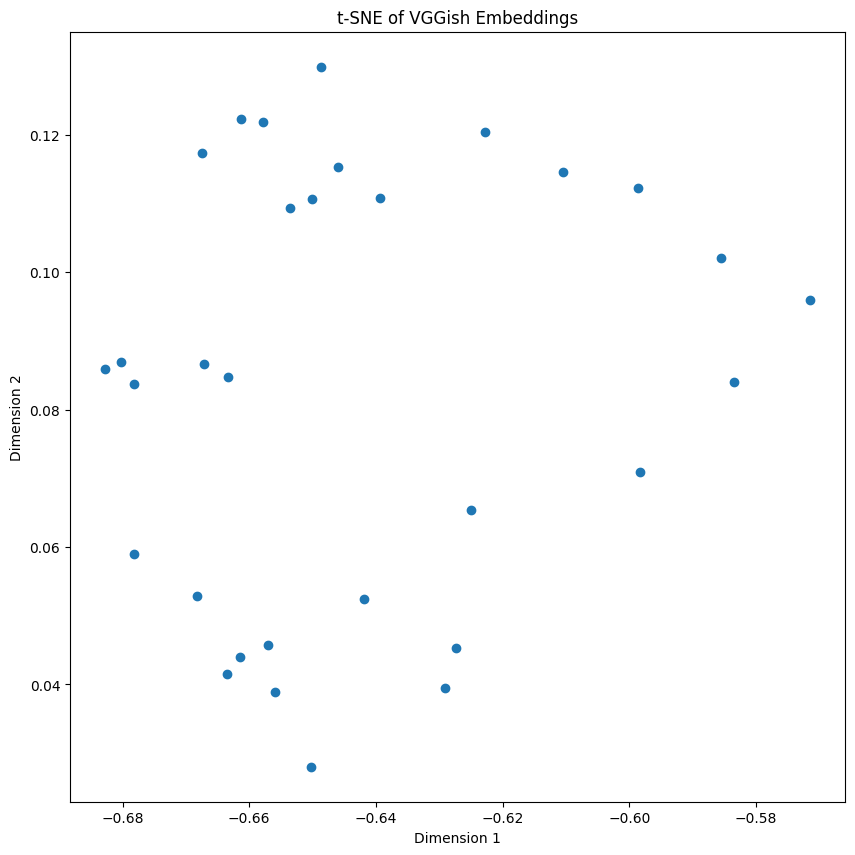

In [49]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(out.detach().numpy())

# Plotting the t-SNE output
plt.figure(figsize=(10, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.title('t-SNE of VGGish Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [ ]:
from torchvggish import vggish, vggish_input

# Initialise model and download weights
embedding_model = vggish()
embedding_model.eval()

example = vggish_input.wavfile_to_examples("example.wav")
embeddings = embedding_model.forward(example)